<a href="https://colab.research.google.com/github/mmessina97/Mental_Health_Factors/blob/main/depression_factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

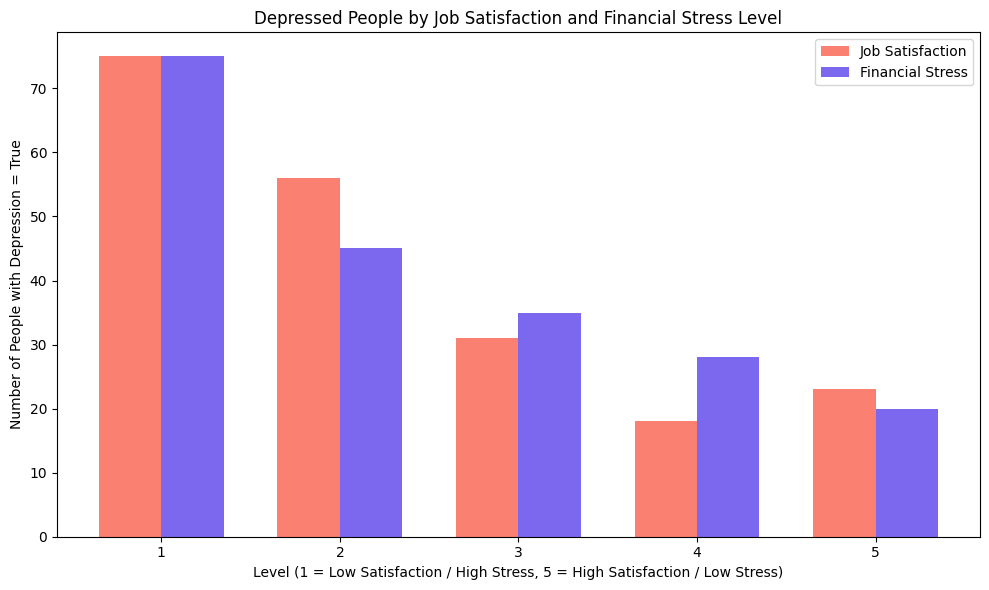

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_excel('Mental_Health_Factors(AutoRecovered).xlsx')

# Convert 'Depression' to boolean
df['Depression'] = df['Depression'].map({'Yes': True, 'No': False})

# Invert Financial Stress scale
df['Financial_Stress'] = 6 - df['Financial_Stress']

# Filter depressed individuals
depressed_df = df[df['Depression'] == True]

# Count depressed people per level
job_sat_counts = depressed_df['Job_Satisfaction'].value_counts().sort_index()
stress_counts = depressed_df['Financial_Stress'].value_counts().sort_index()

# Create aligned DataFrame
levels = range(1, 6)
combined = pd.DataFrame({
    'Job Satisfaction': [job_sat_counts.get(i, 0) for i in levels],
    'Financial Stress': [stress_counts.get(i, 0) for i in levels]
}, index=levels)

# Plot grouped bar chart
x = np.arange(len(combined.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, combined['Job Satisfaction'], width, label='Job Satisfaction', color='salmon')
bars2 = ax.bar(x + width/2, combined['Financial Stress'], width, label='Financial Stress', color='mediumslateblue')

# Labels and formatting
ax.set_xlabel('Level (1 = Low Satisfaction / High Stress, 5 = High Satisfaction / Low Stress)')
ax.set_ylabel('Number of People with Depression = True')
ax.set_title('Depressed People by Job Satisfaction and Financial Stress Level')
ax.set_xticks(x)
ax.set_xticklabels([str(i) for i in levels])
ax.legend()
plt.tight_layout()
plt.show()
